In [7]:
import tensorflow as tf
init_g = tf.global_variables_initializer()
init_l = tf.local_variables_initializer()
with tf.Session() as sess:
    sess.run(init_g)
    sess.run(init_l)

10000 test samples


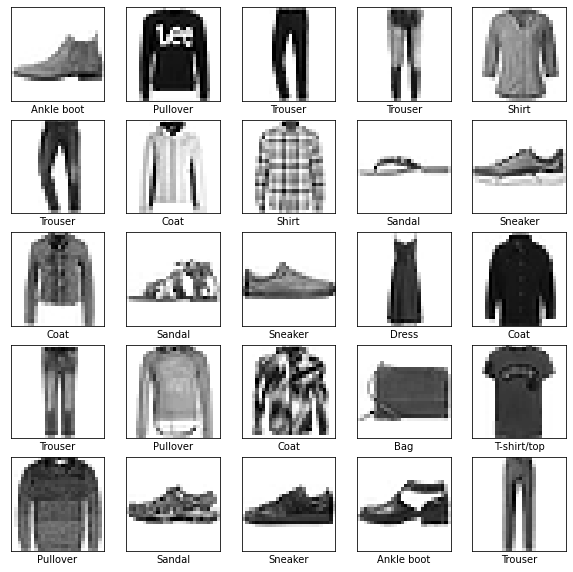

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(_, _), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')
x_test /= 255

print(x_test.shape[0], 'test samples')

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [3]:
from keras.models import load_model

model = load_model('fashion_mnist-gs.h5')
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________________________________________________________

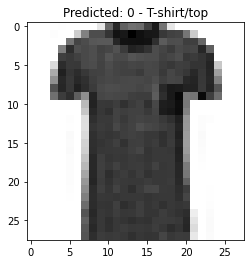

In [4]:
import random

random_idx = random.choice(range(len(x_test)))
to_explain_img = x_test[random_idx]
to_explain_label = int(y_test[random_idx])

plt.figure()
plt.title(f'Predicted: {to_explain_label} - {class_names[to_explain_label]}')
plt.imshow(to_explain_img.reshape(img_rows, img_cols), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

# SHAP - GRADIENT EXPLAINER

In [9]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, x_test)

# we explain the model's predictions on the first three samples of the test set
# shap_values = explainer.shap_values([x_test[:3], x_test[:3]])
shap_values = explainer.shap_values(np.array([to_explain_img]))
shap.image_plot(shap_values[to_explain_label], to_explain_img.reshape(1, 28, 28).astype('float'))

FailedPreconditionError: Attempting to use uninitialized value preds/kernel
	 [[node preds/kernel/read (defined at /home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:402) ]]

Original stack trace for 'preds/kernel/read':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-eeb7f0086b4b>", line 3, in <module>
    model = load_model('fashion_mnist-gs.h5')
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/saving.py", line 419, in load_model
    model = _deserialize_model(f, custom_objects, compile)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/saving.py", line 225, in _deserialize_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/saving.py", line 458, in model_from_config
    return deserialize(config, custom_objects=custom_objects)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/utils/generic_utils.py", line 145, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/sequential.py", line 301, in from_config
    model.add(layer)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/sequential.py", line 181, in add
    output_tensor = layer(self.outputs[0])
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/layers/core.py", line 866, in build
    constraint=self.kernel_constraint)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/engine/base_layer.py", line 252, in add_weight
    constraint=constraint)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 402, in variable
    v = tf.Variable(value, dtype=tf.as_dtype(dtype), name=name)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 220, in _variable_v1_call
    shape=shape)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 198, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2511, in default_variable_creator
    shape=shape)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 263, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1568, in __init__
    shape=shape)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1755, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 86, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4253, in identity
    "Identity", input=input, name=name)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/alicia/workspace/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [7]:
print(f'Predicion - {y_test[0]} {class_names[to_explain_label]}')
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i] for i in range(len(class_names))], to_explain_img.reshape(1, 28, 28).astype('float'),
               labels=np.array(class_names).reshape(1, len(class_names)))

Predicion - 9 Pullover


NameError: name 'shap_values' is not defined